# Clean Tweets Analysis

Tweets are scraped using the `baseline-user-ids.json` input (a list of User IDs) in `twitter_scraper.scrape`. To collect Tweets incrementally, the `scrape` module makes use of `since_id` and `max_id` paramaters issued by [Twitter API](https://developer.twitter.com/en/docs/twitter-api/v1/tweets/timelines/api-reference/get-statuses-user_timeline).

All Tweets are filter by a given date interval, that is currently all Tweets from June 1st, 2022 (2022-06-01).


Tweets data schema:

Column                    | Description                                                           | Data Type
------------------------- | --------------------------------------------------------------------- | -------
id                        | Numeric Tweet identifier                                              | int64
created_at                | Date and time of Tweet creation                                       | datetime64[ns, UTC]
user_id                   | Tweet author                                                          | int64
full_text                 | Tweet full text                                                       | string
hashtags                  | Hashtags used in Tweet                                                | object
user_mentions             | Users mentioned in Tweet                                              | object
is_retweet                | Tweet is a Retweet                                                    | bool
retweet_created_at        | Date and time of Retweet creation                                     | datetime64[ns, UTC]
retweet_timedelta_sec     | Time elapsed between original Tweet and Retweet creation              | Int64 (nullable)
retweet_from_user_id      | Retweet author                                                        | Int64 (nullable)
retweet_from_tweet_id     | Numeric Retweet identifier                                            | Int64 (nullable)
is_reply                  | Tweet is a reply to another Tweet                                     | bool
in_reply_to_status_id     | Original Tweet ID if this Tweet is a reply                            | Int64 (nullable)
in_reply_to_user_id       | Original Tweet's User ID if this Tweet is a reply                     | Int64 (nullable)
is_quote_status           | Tweet is a quote                                                      | bool
favorite_count            | Number of times a Tweet was favorited (liked)                         | int64
possibly_sensitive        | Tweet contains sensitive content                                      | bool
week                      | Month of Tweet creation                                               | string
month                     | Week of Tweet creation                                                | string
langid                    | Tweet language                                                        | string

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style

mpl.style.use('seaborn-v0_8-darkgrid')
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
from preproc import ANALYSIS_COLUMNS

import datetime as dt
import pandas as pd

USER_DISPLAY_NAME = 'user_id'
ANALYSIS_START_DATE = dt.datetime.fromisoformat('2022-11-01T00:00:00+00:00')
ANALYSIS_END_DATE = dt.datetime.fromisoformat('2022-11-30T23:59:59+00:00')

users = pd.read_csv('preproc_users_view.csv', index_col='user_id')
tweets_view = pd.read_csv('preproc_tweets_view.csv', parse_dates=['created_at'])
tweets_view = tweets_view[
    (tweets_view.created_at >= ANALYSIS_START_DATE)
    & (tweets_view.created_at <= ANALYSIS_END_DATE)
]

users_view = users.loc[tweets_view.user_id.unique()].copy()

users_view = users_view[ANALYSIS_COLUMNS['users']]
tweets_view = tweets_view[ANALYSIS_COLUMNS['tweets'] + ['user_id', 'screen_name', 'followers_count', 'friends_count']]

users_view['hashtags'] = users_view['hashtags'].map(eval)
users_view['original_hashtags'] = users_view['original_hashtags'].map(eval)
users_view['retweet_hashtags'] = users_view['retweet_hashtags'].map(eval)
users_view['quote_hashtags'] = users_view['quote_hashtags'].map(eval)

tweets_view['hashtags'] = tweets_view['hashtags'].map(eval)
tweets_view['original_hashtags'] = tweets_view['original_hashtags'].map(eval)
tweets_view['retweet_hashtags'] = tweets_view['retweet_hashtags'].map(eval)
tweets_view['quote_hashtags'] = tweets_view['quote_hashtags'].map(eval)

# users_view['user_mentions'] = users_view['user_mentions'].map(eval)
# users_view['original_user_mentions'] = users_view['original_user_mentions'].map(eval)
# users_view['retweet_user_mentions'] = users_view['retweet_user_mentions'].map(eval)
# users_view['quote_user_mentions'] = users_view['quote_user_mentions'].map(eval)

# tweets_view['user_mentions'] = tweets_view['user_mentions'].map(eval)
# tweets_view['original_user_mentions'] = tweets_view['original_user_mentions'].map(eval)
# tweets_view['retweet_user_mentions'] = tweets_view['retweet_user_mentions'].map(eval)
# tweets_view['quote_user_mentions'] = tweets_view['quote_user_mentions'].map(eval)

stats_df = pd.DataFrame(
    [
        '{:,}'.format(len(users[users.is_croatian == True])),
        '{:,}'.format(len(users_view)),
        '{:,}'.format(len(tweets_view)),
        
        '{0:.2f}%'.format(100*(tweets_view['is_original'].sum() / (tweets_view['is_original'].sum() + tweets_view['is_retweet'].sum()))),
        '{0:.2f}%'.format(100*(tweets_view['is_retweet'].sum() / (tweets_view['is_original'].sum() + tweets_view['is_retweet'].sum()))),
        '{:,}'.format(tweets_view['is_reply'].sum()),
        '{:,}'.format(tweets_view['is_quote'].sum()),
        
        tweets_view.created_at.min(),
        tweets_view.created_at.max()

    ],
    index=[
        "Croatian Users (global) #",
        "Croatian Users (tweets) #",
        "Tweets #",
        
        "Original %",
        "Reweets %",
        "Replies #",
        "Quotes #",
        
        "Earliest Tweet date",
        "Latest Tweet date"
    ],
    columns=['Tweets Data']
)

stats_df

,Tweets Data
Croatian Users (global) #,"48,954"
Croatian Users (tweets) #,"6,887"
Tweets #,"386,168"
Original %,68.66%
Reweets %,31.34%
Replies #,"165,719"
Quotes #,"24,170"
Earliest Tweet date,2022-11-01 00:00:12+00:00
Latest Tweet date,2022-11-30 23:59:52+00:00


In [ ]:
tweets_view.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386158 entries, 2 to 960435
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   id                          386158 non-null  int64              
 1   full_text                   386158 non-null  object             
 2   created_at                  386158 non-null  datetime64[ns, UTC]
 3   year                        386158 non-null  int64              
 4   quarter                     386158 non-null  int64              
 5   quarter_name                386158 non-null  object             
 6   month                       386158 non-null  int64              
 7   month_name                  386158 non-null  object             
 8   week                        386158 non-null  int64              
 9   week_name                   386158 non-null  object             
 10  day                         386158 non-null 

## Interpreting Croatian User Tweets

[Twitter API (user_timeline)](https://developer.twitter.com/en/docs/twitter-api/v1/tweets/timelines/api-reference/get-statuses-user_timeline) contains limitations that disrupt some Analysis performed in "Clean Tweets Analysis". One limitation is that Twitter only allows collecting up to 3,200 of a user's most recent Tweets - making it ambiguous to analyse which users tweet the most in the collected Tweets network. Considreing this limitation, the "Clean Tweets Analysis" focuses on results that show information relations, rather than information quantity. 

To provide support for the listed limitation, the Data Ingestion pipeline is ran bi-weekly, assuming that a user will not post more than 3,200 tweets in a 2-week window. This assumption is analysed by providing a question:

* What is the maximum number of tweets per user in a 2-week window?

The "Clean Tweets Analysis" aims to create questions and provide answers based on a subset of available information (columns):

Column(s)                           | Questions
----------------------------------- | ----------------------------------------------
hashtags                            | - What are the most frequently used hashtags on a monthly basis?
hashtags + user_id                  | - What hashtags are linked to a user on average in total? <br> - What hashtags are linked to a user on average on a monthly basis?
user_mentions                       | - Who are the most frequently mentioned users on a monthly basis?
is_retweet + hashtags               | - What hashtags are used in retweets against original tweets in total? <br> - How do retweet hashtags correlate to original tweet hashtags?
is_retweet + user_id                | - What is the ratio between retweets and original tweets per top 10 tweeters on a monthly basis?
is_reply + is_retweet               | - What is the ratio between retweets, replies and original tweets?
is_reply + hashtags                 | - What hashtags are used in replies against original tweets in total? <br> - How do reply hashtags correlate to original tweet hashtags?
is_reply + user_id                  | - What is the ratio between replies and original tweets per top 10 tweeters on a monthly basis?
favorite_count + user_id            | - What users have the most favorite count in total? <br> - What users have the most favorite count on a monthly basis?
favorite_count + hashtags           | - What hashtags have the most favorite count in total? <br> - What hashtags have the most favorite count on a monthly basis?
retweet_timedelta_sec               | - What is the average retweet_timedelta_sec?
retweet_timedelta_sec + user_id     | - What users retweet the fastest?
retweet_timedelta_sec + hashtags    | - What hashtags are retweeted the fastest?

In [ ]:
import numpy as np

def df_format_decimal(df):
    format_df = df.copy()
    for col_name in df.columns:
        format_df.loc[:, col_name] = format_df[col_name].transform(lambda x: '{0:,}'.format(x))
    return format_df


df_format_decimal(
    tweets_view[
        ['followers_count',
        'friends_count',
        'in_retweet_cnt',
        'in_reply_cnt',
        'in_quote_cnt',
        'original_favorite_cnt',
        'retweet_favorite_cnt',
        'quote_favorite_cnt',
        'out_retweet_timedelta_sec',
        'out_quote_timedelta_sec',
        'in_retweet_timedelta_sec',
        'in_quote_timedelta_sec']
    ].describe(percentiles=[.3, .6, .9]).transpose().round(2)
)# .style.to_latex(open('descriptive-statistics.tex', 'w'))

,count,mean,std,min,30%,50%,60%,90%,max
followers_count,"386,158.0","6,444.67","38,575.61",11.0,239.0,606.0,847.0,"3,943.0","1,541,746.0"
friends_count,"386,158.0",981.87,"1,073.51",11.0,315.0,577.0,786.0,"2,427.0","5,002.0"
in_retweet_cnt,"386,158.0",0.02,0.21,0.0,0.0,0.0,0.0,0.0,43.0
in_reply_cnt,"386,158.0",0.08,0.39,0.0,0.0,0.0,0.0,0.0,26.0
in_quote_cnt,"386,158.0",0.01,0.11,0.0,0.0,0.0,0.0,0.0,23.0
original_favorite_cnt,"386,158.0",3.76,93.24,0.0,0.0,0.0,1.0,4.0,"44,439.0"
retweet_favorite_cnt,"121,006.0","21,294.24","79,291.23",0.0,111.0,675.0,"1,631.0","47,201.5","2,141,179.0"
quote_favorite_cnt,"15,915.0","25,066.13","101,367.33",0.0,57.0,427.0,"1,280.2","48,253.8","2,141,259.0"
out_retweet_timedelta_sec,"338,183.0","911,719.7","3,888,280.84",8.5,"35,866.96","68,446.94","142,641.3","1,729,478.65","315,960,857.0"
out_quote_timedelta_sec,"262,429.0","1,307,178.16","5,773,052.47",20.33,"36,335.07","77,357.86","174,279.0","2,609,066.96","281,322,829.8"


In [ ]:
tweets_view[
    # (tweets_view['screen_name'] == 'DNEVNIKhr') & 
    (tweets_view['in_retweet_cnt'] > 10)
][[
    'created_at', 'screen_name', 'is_original', 'is_retweet', 'is_reply', 'full_text', 'hashtags',
    'user_mentions', 'in_retweet_cnt', 'in_reply_cnt', 'in_quote_cnt'
]].sort_values('in_retweet_cnt', ascending=False)

,created_at,screen_name,is_original,is_retweet,is_reply,full_text,hashtags,user_mentions,in_retweet_cnt,in_reply_cnt,in_quote_cnt
573618,2022-11-27 18:04:47+00:00,HNS_CFF,True,False,False,"This feels good.\n\n#Vatreni, congratulations!...","[Vatreni, CROCAN, FIFAWorldCup, Qatar2022, Fam...",[],43,4,19
573711,2022-11-09 10:14:43+00:00,HNS_CFF,True,False,False,HERE IT IS! 🥁\n\n🇭🇷➡️🇶🇦\n#Croatia squad for th...,"[Croatia, WorldCup, Family, Vatreni]",['FIFAWorldCup'],23,4,23
249076,2022-11-17 08:14:00+00:00,CROTradwave,True,False,False,"3⃣1⃣ years ago, the city of Vukovar 🇭🇷 experie...",[],[],22,0,4
573628,2022-11-27 16:50:11+00:00,HNS_CFF,True,False,False,#Croatia now in front! ⚽️ #CROCAN \n\n#FIFAWor...,"[Croatia, CROCAN, FIFAWorldCup, Qatar2022, Fam...",[],20,3,3
574086,2022-11-23 08:36:05+00:00,HNS_CFF,True,False,False,Here is your #Croatia starting lineup for the ...,"[Croatia, FIFAWorldCup, MARCRO, Family, Vatren...",[],20,2,14
107296,2022-11-03 10:39:55+00:00,mozemoHR,True,False,False,U zagrebačkoj gradskoj bolnici Sveti Duh se od...,[],[],17,6,7
573924,2022-11-21 19:15:55+00:00,HNS_CFF,True,False,False,This is #Croatia.\nThis is the #FIFAWorldCup.\...,"[Croatia, FIFAWorldCup, Family, Vatreni]",[],15,1,4
248980,2022-11-02 08:07:45+00:00,CROTradwave,True,False,False,💣 Vukovar was the biggest and bloodiest battle...,[],[],14,0,0
522614,2022-11-10 10:31:50+00:00,BiljanaBorzan,True,False,False,"🍾 Huraaaaaaaaaaa!!!!! S 534 za, 53 protiv i 25...",[Schengen],['Europarl_EN'],13,10,3
814628,2022-11-07 14:46:54+00:00,jakovcic_eugen,True,False,False,"Ono kada ti saborski zastupnik Ante Deur, mrta...",[],[],13,14,5


In [4]:
import warnings
warnings.simplefilter(action = "ignore", category = UserWarning)


PLOT_CONFIG = {
    'positive_cols': {
        'in_retweet_cnt': 'Retweeted', 
        'in_reply_cnt': 'Replied', 
        'in_quote_cnt': 'Quoted'
    },
    'negative_cols': {
        'out_retweet_cnt': 'Retweet', 
        'out_reply_cnt': 'Reply', 
        'out_quote_cnt': 'Quote',
        # 'original_tweets_cnt': 'Original'
    },
    'other_cols': {
        'total_out_tweets_cnt': 'Total num. of Tweets'
    }
}

rename_map = dict(PLOT_CONFIG['positive_cols'], **PLOT_CONFIG['negative_cols'])

def plot_top_tweets(df, title, max_x, export_plot_name=None):
    fig, ax = plt.subplots(1, figsize=(14, 8))

    top_tweets_df = df[
        ['original_tweets_cnt', 
         'out_retweet_cnt', 'out_reply_cnt', 'out_quote_cnt', 
         'in_retweet_cnt', 'in_reply_cnt', 'in_quote_cnt' ]
    ].copy()

    top_tweets_df['original_tweets_cnt'] = top_tweets_df['original_tweets_cnt'] * -1
    top_tweets_df['out_retweet_cnt'] = top_tweets_df['out_retweet_cnt'] * -1
    top_tweets_df['out_reply_cnt'] = top_tweets_df['out_reply_cnt'] * -1
    top_tweets_df['out_quote_cnt'] = top_tweets_df['out_quote_cnt'] * -1
    
    rename_map = dict(PLOT_CONFIG['positive_cols'], **PLOT_CONFIG['negative_cols'])
    top_tweets_df = top_tweets_df.rename(columns=rename_map)
    
    x1000 = max_x % 1000
    max_x = ((max_x-x1000) // 1000) * 1000 + 1000
    min_x = max_x * -1
    
    positive_cols = PLOT_CONFIG['positive_cols'].values()
    negative_cols = PLOT_CONFIG['negative_cols'].values()
    
    top_tweets_df[negative_cols].plot.barh(
        ax=ax, 
        alpha=0.5,
        stacked=True,
        color={
            'Original': default_colors[0], 
            'Retweet': default_colors[1], 
            'Reply': default_colors[2], 
            'Quote': default_colors[3]
        }
    )
    legend_1 = plt.legend(negative_cols, loc='upper left')
    for i, color in enumerate(default_colors[1:len(negative_cols)]):
        legend_1.legendHandles[i].set_color(color)
    legend_1.legendHandles[i+1].set_color(default_colors[0])


    top_tweets_df[positive_cols].plot.barh(
        ax=ax,
        stacked=True,
        color={
            'Retweeted': default_colors[1], 
            'Replied': default_colors[2], 
            'Quoted': default_colors[3]
        }
    )
    legend_2 = plt.legend(positive_cols, loc='upper right')
    for i, color in enumerate(default_colors[1:len(positive_cols)+1]):
        legend_2.legendHandles[i].set_color(color)
    
    ax.add_artist(legend_1)
    ax.add_artist(legend_2)
    ax.set_title(title)
    ax.set_xlabel('Tweet Count')
    ax.set_ylabel('User Name')
    ax.set_xlim(min_x, max_x)
    ticks = ax.get_xticks()
    ax.set_xticklabels([int(abs(tick)) for tick in ticks])
    ax.axvline(color='red')

    if export_plot_name:
        plt.savefig(export_plot_name + '.eps', format='eps', papertype='a4', dpi=200)
    plt.show()
    

In [7]:
AGGREGATE = dict(
    followers_cnt=('followers_count', 'mean'),
    friends_cnt=('friends_count', 'mean'),
    
    original_favorite_cnt=('original_favorite_cnt', 'sum'),
    retweet_favorite_cnt=('retweet_favorite_cnt', 'sum'),
    quote_favorite_cnt=('quote_favorite_cnt', 'sum'),
    
    total_out_tweets_cnt=('week_name', 'size'),
    original_tweets_cnt=('is_original', 'sum'),
    out_retweet_cnt=('is_retweet', 'sum'),
    out_reply_cnt=('is_reply', 'sum'),
    out_quote_cnt=('is_quote', 'sum'),
    
    total_in_tweets_cnt=('total_in_tweets_cnt', 'sum'),
    in_retweet_cnt=('in_retweet_cnt', 'sum'),
    in_reply_cnt=('in_reply_cnt', 'sum'),
    in_quote_cnt=('in_quote_cnt', 'sum'),
    
    out_retweet_timedelta_sec=('out_retweet_timedelta_sec', 'mean'),
    out_quote_timedelta_sec=('out_quote_timedelta_sec', 'mean'),
    in_retweet_timedelta_sec=('in_retweet_timedelta_sec', 'mean'),
    in_quote_timedelta_sec=('in_quote_timedelta_sec', 'mean')
)

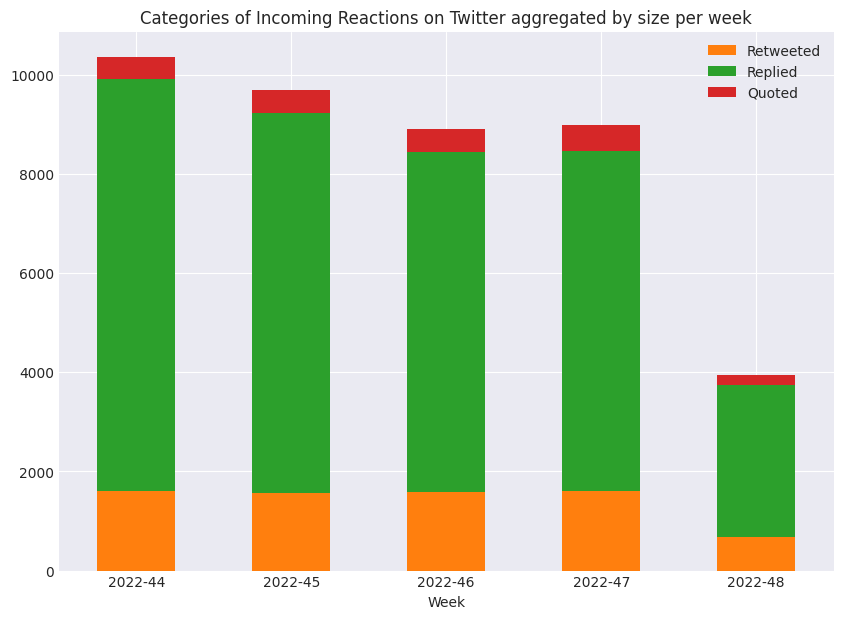

In [9]:
top_tweets = tweets_view.groupby('week_name').agg(**AGGREGATE)

ax = top_tweets.rename(columns=rename_map)[['Retweeted', 'Replied', 'Quoted']].plot.bar(
    rot=0, 
    stacked=True, 
    figsize=(10, 7),
    title='Categories of Incoming Reactions on Twitter aggregated by size per week',
    color={
        'Retweeted': default_colors[1], 
        'Replied': default_colors[2], 
        'Quoted': default_colors[3]
    }
)
ax.set_xlabel('Week')
plt.savefig('eps/tweets-incoming-reactions.eps', format='eps', papertype='a4', dpi=200)
plt.show()

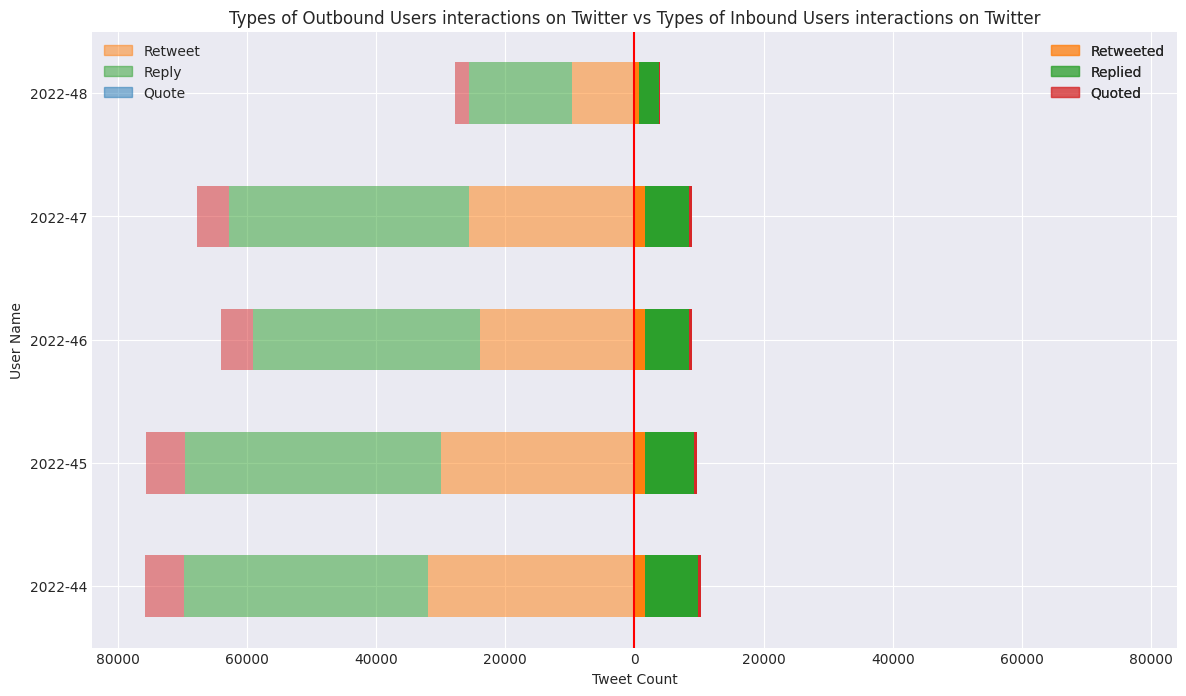

In [ ]:
top_tweets['max_tweets'] = top_tweets.apply(lambda row: sum((row.out_retweet_cnt, row.out_reply_cnt, row.out_quote_cnt)), axis=1)
MAX_X = top_tweets['max_tweets'].max() + (top_tweets['max_tweets'].max() * .1)

plot_top_tweets(
    top_tweets, 
    title=(
        'Types of Outbound Users interactions on Twitter vs '
        'Types of Inbound Users interactions on Twitter'
    ),
    max_x=MAX_X
)

In [ ]:
gdf = tweets_view[
    (tweets_view['retweet_from_screen_name'].isin(tweets_view['screen_name']))
].rename(columns={
    'screen_name': 'source',
    'retweet_from_screen_name': 'target'
})[['source', 'target']].groupby(['source', 'target']).agg(weight=('source', 'size')).sort_values('weight', ascending=False)

gdf[gdf['weight'] > 5]

,,weight
source,target,
novahr,DNEVNIKhr,277
capnek123,capnek123,177
IvanCar47530225,VladaRH,175
scedroisland,scedroisland,166
Marina87251891,Marina87251891,140
...,...,...
DNEVNIKhr,BuljanNovaTV,6
arsenaloFka,CroatiaFooty,6
Antimon_Zg,RIllyricum,6


In [ ]:
import holoviews as hv

hv.Chord(gdf[gdf['weight'] > 5])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/milky/Envs/twitter_scraper/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_155908/1272129309.py", line 3, in <module>
    hv.Chord(gdf[gdf['weight'] > 5])
  File "/home/milky/Envs/twitter_scraper/lib/python3.8/site-packages/holoviews/element/graphs.py", line 779, in __init__
    super(Graph, self).__init__(edges, kdims=kdims, vdims=vdims, **params)
  File "/home/milky/Envs/twitter_scraper/lib/python3.8/site-packages/holoviews/core/data/__init__.py", line 341, in __init__
    super(Dataset, self).__init__(data, **dict(kwargs, **dict(dims, **extra_kws)))
  File "/home/milky/Envs/twitter_scraper/lib/python3.8/site-packages/holoviews/core/dimension.py", line 844, in __init__
    super().__init__(data, **params)
  File "/home/milky/Envs/twitter_scraper/lib/python3.8/site-packages/holoviews/core/dimension.py", line 503, in __init_

## month + user_id + favorite_count
  - What users have the most favorite count in total?

- What kind of communities are people with a greater number of favorites sorrounded with?

  - What users have the most favorite count on a monthly basis?

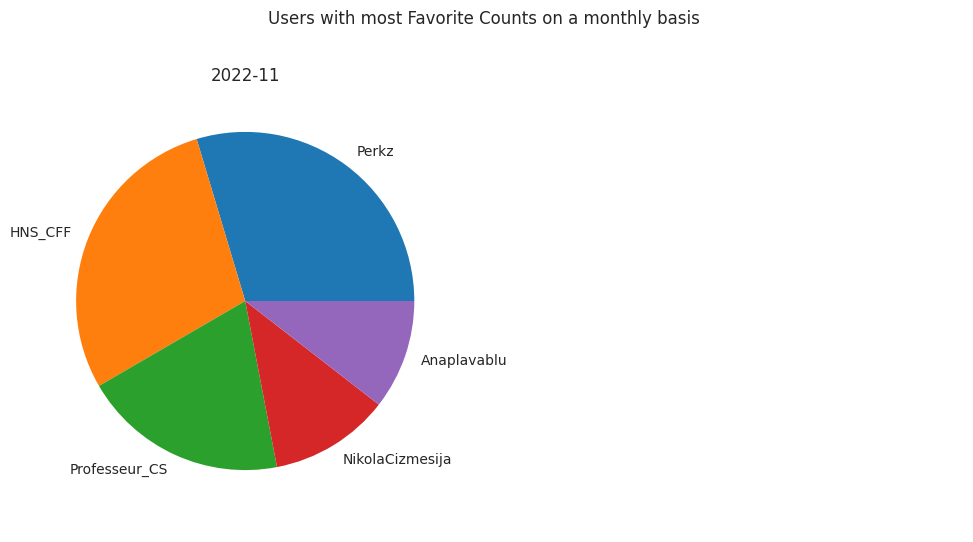

In [ ]:
from math import ceil

ncols = 2
nrows = ceil(len(tweets_view.month_name.unique())/ncols)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*6, nrows*6), squeeze=False)

plt.suptitle('Users with most Favorite Counts on a monthly basis')

gdf = tweets_view.groupby(['month_name', 'screen_name']).agg(
    favorite_count=('original_favorite_cnt', 'sum')
).sort_values(['month_name', 'favorite_count'], ascending=False).rename(
    columns={'favorite_count': 'Favorite Count'}
)

i, j = 0, 0
for month in gdf.index.get_level_values('month_name').unique():
    if j == ncols: j = 0; i += 1

    gdf.loc[month].head(5).plot(kind='pie', y='Favorite Count', ax=axs[i][j], legend=None)
    axs[i][j].set_title(month)
    axs[i][j].set_ylabel(None)
    
    j += 1

plt.axis('off')
plt.show()

- How does the number of favorites change through time as the user gets more followers?

## month + favorite_count + hashtags
  - What hashtags have the most favorite count in total?
  - What hashtags have the most favorite count on a monthly basis?

In [ ]:
import warnings
warnings.filterwarnings('ignore')

ax = favorites_view[['favorite_count', 'original_hashtags']].explode(
    ['original_hashtags']
).dropna().groupby('original_hashtags').agg(
    favorite_count=('favorite_count', 'sum')
).sort_values('favorite_count', ascending=False).head(20)[::-1] \
 .plot(kind='barh', y='favorite_count', legend=None, figsize=(7, 8))

ax.set_ylabel(None)
ax.set_title('Most Favored Hashtags in Total')
plt.show()

In [ ]:
ncols = 2
nrows = ceil(len(unique_months) / ncols)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*6), squeeze=False)
plt.suptitle('Most Favored Hashtags on a monthly basis')

gdf = favorites_view[['favorite_count', 'original_hashtags']].explode(
    ['original_hashtags']
).dropna().groupby(['month_name', 'original_hashtags']).agg(
    favorite_count=('favorite_count', 'sum')
).sort_values(['month_name', 'favorite_count'], ascending=False).rename(
    columns={'favorite_count': 'Favorite Count'}
)

max_favorite_count = max(gdf['Favorite Count']) + 10000

i, j = 0, 0
for month in unique_months:
    if j == ncols: j = 0; i += 1

    gdf.loc[month].head(5).plot(kind='pie', y='Favorite Count', ax=axs[i][j], legend=None)
    axs[i][j].set_title(month)
    axs[i][j].set_ylabel(None)
    
    j += 1

plt.axis('off')
plt.show()

# Hashtags

In [ ]:
hashtags_view = tweets_view[['id', 'screen_name', 'year', 'month', 'original_hashtags', 'is_original', 'is_retweet', 'is_reply', 'is_quote', 'original_favorite_count']] \
    .explode('original_hashtags').rename(columns={'original_hashtags': 'hashtags', 'original_favorite_count': 'favorite_count'}).dropna()
hashtags_view.sample(10)

## month + hashtags
- What are the most frequently used hashtags in total? How are they distributed in retweets, replies and original tweets?


In [ ]:
agg_hashtags_view = hashtags_view.groupby('hashtags').agg(
    total=('hashtags', 'size'),
    is_original=('is_original', 'sum'),
    is_retweet=('is_retweet', 'sum'),
    is_reply=('is_reply', 'sum')
).sort_values('total', ascending=False)
agg_hashtags_view['original'] = agg_hashtags_view['total'] - (agg_hashtags_view['is_retweet'] + agg_hashtags_view['is_reply'])

ax = agg_hashtags_view[['is_original', 'is_retweet', 'is_reply']].rename(columns={
  'is_original': 'Original',
  'is_retweet': 'Retweet',
  'is_reply': 'Reply'
}).head(50)[::-1].plot.barh(stacked=True, figsize=(12, 16))

ax.set_title('Top 50 most frequent Original/Retweeted/Reply Tweets')
ax.set_ylabel("Hashtag")
ax.legend(loc='center right')
plt.show()

- What are the most frequently used hashtags on a monthly basis? How are they distributed in retweets, replies and original tweets?

In [ ]:
month_hashtags_view = hashtags_view.groupby(['year', 'month', 'hashtags']).agg(
    favorite_count=('favorite_count', 'sum'),
    total=('hashtags', 'size'),
    is_original=('is_original', 'sum'),
    is_retweet=('is_retweet', 'sum'),
    is_reply=('is_reply', 'sum')
).sort_values(['year', 'month', 'total'], ascending=False)
month_hashtags_view

In [ ]:
ncols = 2
nrows = ceil(len(unique_months) / ncols)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*6), squeeze=False)
plt.suptitle("Monthly Hashtag occurence per Original/Retweeted/Reply Tweet")

month_hashtags = month_hashtags_view[['is_original', 'is_retweet', 'is_reply']].rename(columns={
    'is_original': 'Original',
    'is_retweet': 'Retweet',
    'is_reply': 'Reply'
})

i, j = 0, 0
for month in unique_months:
    if j == ncols: j = 0; i += 1
    
    year, mon = tuple(map(int, month.split('-')))
    plot_df = month_hashtags.loc[(year, mon)]
    plot_df.head(8).plot.bar(ax=axs[i][j], stacked=True, rot=30)
    axs[i][j].set_title(month)
    # ax.set_ylabel(month)
    axs[i][j].set_xlabel(None)
    
    j += 1

if len(unique_months) % ncols != 0:
    plt.axis('off')
plt.show()

In [ ]:
def get_hashtags_groupby(df, groupby=['hashtags', 'year', 'month', 'screen_name']):
    hashtags_groupby = df.groupby(groupby).agg(
        favorite_count=('favorite_count', 'sum'),
        is_original=('is_original', 'sum'), 
        is_retweet=('is_retweet', 'sum'), 
        is_reply=('is_reply', 'sum'),
        user_hashtag_cnt=('screen_name', 'size')
    )

    gdf = hashtags_groupby.copy()
    gdf['total_hashtag_cnt'] = gdf['is_original'] + gdf['is_retweet']
    gdf['user_hashtag_pct'] = gdf['user_hashtag_cnt'] / gdf['total_hashtag_cnt']
    gdf['avg_user_hashtag_pct'] = gdf.index.to_series().apply(lambda x: gdf.loc[(x[0], x[1], x[2]), 'user_hashtag_pct'].mean())
    return gdf.sort_index()

# hashtags_user_month_groupby = get_hashtags_groupby(hashtags_view, ['hashtags', 'screen_name', 'year', 'mon'])
# hashtags_user_month_groupby[hashtags_user_month_groupby['user_hashtag_pct'] != 1].sort_values('is_retweet', ascending=False).head(30)
hashtags_groupby = get_hashtags_groupby(hashtags_view, ['hashtags', 'year', 'month', 'screen_name'])
#hashtags_groupby.loc[(hashtags_groupby.index.get_level_values('hashtags').isin(('SlavaUkraini', 'hrvatska', 'dnevnikhr')), slice(None))][180:240].head(60)#.sort_values('user_hashtag_pct', ascending=False).head(30)
hashtags_groupby

In [ ]:
nrows = 1
ncols = 3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))

total_hashtags = hashtags_groupby.groupby('hashtags').agg(
    total_hashtag_cnt=('user_hashtag_cnt', 'sum')
)

user_hashtags = hashtags_groupby.groupby(['hashtags', 'screen_name']).agg(
    user_hashtag_cnt=('user_hashtag_cnt', 'sum')
)

total_hashtag_cnt_view = user_hashtags.groupby('hashtags').sum()
user_hashtags['total_hashtag_cnt'] = user_hashtags.index.to_series().apply(lambda x: total_hashtag_cnt_view.loc[x[0]])
user_hashtags['user_hashtag_pct'] = user_hashtags['user_hashtag_cnt'] / user_hashtags['total_hashtag_cnt']


total_hashtags.total_hashtag_cnt.hist(ax=axs[0], log=True)
axs[0].set_title('[log] Total Hashtag Count distribution')
axs[0].set_ylabel('Num. of Hashtags')
axs[0].set_xlabel('Total Count')
user_hashtags.user_hashtag_cnt.hist(ax=axs[1], log=True)
axs[1].set_title('[log] User Hashtag Count distribution')
axs[1].set_ylabel('Num. of Hashtags')
axs[1].set_xlabel('User Count')
user_hashtags.user_hashtag_pct.hist(ax=axs[2])
axs[2].set_title('User Hashtag Percentage distribution')
axs[2].set_ylabel('Num. of Hashtags')
axs[2].set_xlabel('User Percentage')

plt.tight_layout()
plt.show()

In [ ]:
def normalize_hashtags_groupby(hashtags_gby):
    hashtags_gby['user_hashtag_cnt'] = hashtags_gby.apply(lambda row: 1 if row.user_hashtag_pct > 0.5 else row.user_hashtag_cnt, axis=1)
    hashtags_gby['is_retweet'] = hashtags_gby.apply(lambda row: 1 if row.user_hashtag_pct > 0.5 and row.is_retweet > 0 else row.is_retweet, axis=1)
    hashtags_gby['is_reply'] = hashtags_gby.apply(lambda row: 1 if row.user_hashtag_pct > 0.5 and row.is_reply > 0 else row.is_reply, axis=1)
    hashtags_gby['total_hashtag_cnt'] = hashtags_gby['is_original'] + hashtags_gby['is_reply']
    
    hashtags_gby['user_hashtag_pct'] = hashtags_gby['user_hashtag_cnt'] / hashtags_gby['total_hashtag_cnt']
    hashtags_gby['avg_user_hashtag_pct'] = hashtags_gby.index.to_series().apply(
        lambda x: hashtags_gby.loc[(x[0], x[1], x[2]), 'user_hashtag_pct'].mean()
    )
    return hashtags_gby


hashtags_groupby_1 = normalize_hashtags_groupby(hashtags_groupby)
# hashtags_groupby_1 = normalize_hashtags_groupby(hashtags_groupby_1)

In [ ]:
print("Hashtags per User, mean before transform: ", hashtags_groupby.user_hashtag_cnt.mean())
print("Hashtags per User, mean after transform: ", hashtags_groupby_1.user_hashtag_cnt.mean())

In [ ]:
nrows = 1
ncols = 3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))

total_hashtags = hashtags_groupby_1.groupby('hashtags').agg(
    total_hashtag_cnt=('user_hashtag_cnt', 'sum'),
    original_hashtag_cnt=('is_original', 'sum'),
    retweet_hashtag_cnt=('is_retweet', 'sum'),
    reply_hashtag_cnt=('is_reply', 'sum')
)

user_hashtags = hashtags_groupby_1.groupby(['hashtags', 'screen_name']).agg(
    user_hashtag_cnt=('user_hashtag_cnt', 'sum')
)

total_hashtag_cnt_view = user_hashtags.groupby('hashtags').sum()
user_hashtags['total_hashtag_cnt'] = user_hashtags.index.to_series().apply(lambda x: total_hashtag_cnt_view.loc[x[0]])
user_hashtags['user_hashtag_pct'] = user_hashtags['user_hashtag_cnt'] / user_hashtags['total_hashtag_cnt']


total_hashtags.total_hashtag_cnt.hist(ax=axs[0], log=True)
axs[0].set_title('Total Hashtag Count distribution')
axs[0].set_ylabel('Num. of Hashtags')
axs[0].set_xlabel('Total Count')
user_hashtags.user_hashtag_cnt.hist(ax=axs[1], log=True)
axs[1].set_title('User Hashtag Count distribution')
axs[1].set_ylabel('Num. of Hashtags')
axs[1].set_xlabel('User Count')
user_hashtags.user_hashtag_pct.hist(ax=axs[2])
axs[2].set_title('User Hashtag Share distribution')
axs[2].set_ylabel('Num. of Hashtags')
axs[2].set_xlabel('User Percentage')

plt.tight_layout()
plt.show()

In [ ]:
agg_hashtags_view = total_hashtags.sort_values('total_hashtag_cnt', ascending=False)
ax = agg_hashtags_view[['original_hashtag_cnt', 'retweet_hashtag_cnt', 'reply_hashtag_cnt']].rename(columns={
  'original_hashtag_cnt': 'Original',
  'retweet_hashtag_cnt': 'Retweet',
  'reply_hashtag_cnt': 'Reply'
}).head(50)[::-1].plot.barh(stacked=True, figsize=(12, 16))

ax.set_title('Top 50 most frequent Original/Retweeted/Reply Tweets')
ax.set_ylabel("Hashtag")
ax.legend(loc='center right')
plt.show()

## month + hashtags
  - What are the most frequently used hashtags on a monthly basis?

In [ ]:
ncols = 2
nrows = ceil(len(unique_months) / ncols)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*6), squeeze=False)
plt.suptitle("Monthly Hashtag occurance per Original/Retweeted/Reply Tweet")

month_hashtags = hashtags_groupby_1.groupby(['year', 'month', 'hashtags']).agg(
    total_hashtag_cnt=('user_hashtag_cnt', 'sum'),
    retweet_hashtag_cnt=('is_retweet', 'sum'),
    reply_hashtag_cnt=('is_reply', 'sum')
).sort_values('total_hashtag_cnt', ascending=False)
month_hashtags['original_hashtag_cnt'] = month_hashtags['total_hashtag_cnt'] - (month_hashtags['retweet_hashtag_cnt'] + month_hashtags['reply_hashtag_cnt'])

month_hashtags = month_hashtags[['original_hashtag_cnt', 'retweet_hashtag_cnt', 'reply_hashtag_cnt']].rename(columns={
    'original_hashtag_cnt': 'Original',
    'retweet_hashtag_cnt': 'Retweet',
    'reply_hashtag_cnt': 'Reply'
})

i, j = 0, 0
for month in unique_months:
    if j == ncols: j = 0; i += 1
    
    year, mon = tuple(map(int, month.split('-')))
    plot_df = month_hashtags.loc[(year, mon)]
    plot_df.head(10).plot.bar(ax=axs[i][j], stacked=True, rot=30)
    axs[i][j].set_title(month)
    # ax.set_ylabel(month)
    axs[i][j].set_xlabel(None)
    j += 1

if len(unique_months) % 2 != 0:
    plt.axis('off')
plt.show()

## hashtags + user_id
  - What hashtags are linked to a user on average in total?
  - What hashtags are linked to a user on average on a monthly basis?

In [ ]:
month_hashtags['Total'] = month_hashtags['Original'] + month_hashtags['Retweet'] + month_hashtags['Reply']

wordcloud_dict = {}
for year, mon, hashtag in month_hashtags.index:
    key = "{}-{}".format(year, str(mon).zfill(2))
    if key not in wordcloud_dict:
        wordcloud_dict[key] = []
    # print(year, mon, hashtag, month_hashtags.loc[(year, mon, hashtag), 'Total'])
    wordcloud_dict[key].append('{} '.format(hashtag) * int(month_hashtags.loc[(year, mon, hashtag), 'Total']))
wordcloud_dict = {key: " ".join(value) for key, value in wordcloud_dict.items()}

In [ ]:
from wordcloud import WordCloud

fig, axs = plt.subplots(len(unique_months), figsize=(9, len(unique_months)*6), squeeze=False)

for i, month in enumerate(unique_months):
    wordcloud = WordCloud(collocations=False, background_color='white', width=1280, height=720, margin=10).generate(wordcloud_dict[month])
    axs[i][0].imshow(wordcloud, interpolation='bilinear')
    axs[i][0].set_title(month)
    axs[i][0].axis('off')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=None)

htag_count = tweets_view['all_hashtags'].explode().dropna().value_counts()
htag_count.head(25).iloc[::-1].plot.barh(ax=ax)

ax.set_title('Most tweeted Hashtags')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=None)

htag_count = tweets_view[tweets_view['followers_count'] < 40_000]['all_hashtags'].explode().dropna().value_counts()
htag_count.head(25).iloc[::-1].plot.barh(ax=ax)

ax.set_title('Most tweeted Hashtags w/o profiles w/ > 40,000 followers')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(9, 7))

ument_count = tweets_view[['user_id', 'user_mentions']].explode('user_mentions').dropna()
ument_count = ument_count.merge(users_view[['user_id', 'screen_name']], how='inner', on='user_id')
ument_count = ument_count.merge(users_view[['user_id', 'screen_name']], how='left', left_on='user_mentions', right_on='screen_name', suffixes=['_source', '_target'])
ument_count = ument_count.groupby(['screen_name_source', 'screen_name_target']).size().sort_values(ascending=False)
ument_count.head(25).iloc[::-1].plot.barh(ax=ax)

ax.set_title('Most mentioned Users')
ax.set_ylabel('Source User to Mentioned User')
ax.set_yticklabels(["{} -- {}".format(src, tgt) for src, tgt in ument_count.head(25).iloc[::-1].index])
plt.show()